In [20]:
import os
from zipfile import ZipFile
from os import listdir

import numpy as np
import random
import pandas as pd
import tensorflow as tf

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2

import pathlib
import datetime

import kagglehub

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Dataset download and exploration

In [2]:
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

In [3]:
os.listdir(path)

['img_align_celeba',
 'list_attr_celeba.csv',
 'list_bbox_celeba.csv',
 'list_eval_partition.csv',
 'list_landmarks_align_celeba.csv']

In [4]:
img_dir = os.path.join(path, 'img_align_celeba', 'img_align_celeba')
os.listdir(img_dir)

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [5]:
attr_path = os.path.join(path, "list_attr_celeba.csv")
partition_path = os.path.join(path, "list_eval_partition.csv")

In [6]:
attrs = pd.read_csv(attr_path)
parts = pd.read_csv(partition_path)

In [7]:
attrs

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [8]:
attrs.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

Each row is an image, with 40 attributes

In [9]:
parts

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


As autors suggest, 0 for training, 1 for validation and 2 for testing

In [10]:
df = attrs.merge(parts, on="image_id")
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,partition
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,0
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,0
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,0
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,0
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,0


## Binary classification: "Male"

In [23]:
# convert labels from -1,+1 to 0,1

df["Male"] = (df["Male"] == 1).astype(int)
df["Male"].unique()

array([0, 1])

In [25]:
train_df = df[df.partition == 0]
val_df = df[df.partition == 1]
test_df = df[df.partition == 2]

print(len(train_df), len(val_df), len(test_df))

162770 19867 19962


C:\Users\Chiara\.cache\kagglehub\datasets\jessicali9530\celeba-dataset\versions\2\img_align_celeba\img_align_celeba\000001.jpg
True


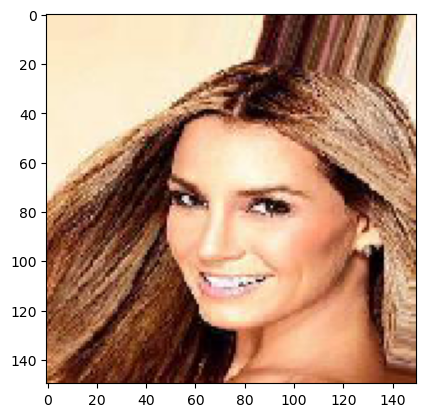

In [27]:
# Visualize one image

sample = train_df.iloc[0]
img_path = os.path.join(img_dir, sample.image_id)

print(img_path)
print(os.path.exists(img_path))

img = load_img(img_path, target_size=(150,150))
plt.imshow(img)

In [29]:
# rescaling images

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    directory=img_dir,
    x_col="image_id",
    y_col="Male",
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=True
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    directory=img_dir,
    x_col="image_id",
    y_col="Male",
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

Found 162770 validated image filenames.
Found 19867 validated image filenames.


In [32]:
# CNN architecture

model = Sequential([

    Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

C:\Users\Chiara\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313,761 (20.27 MB)

 Trainable params: 5,313,761 (20.27 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [35]:
history = model.fit(
    train_gen, 
    validation_data=val_gen, 
    steps_per_epoch=500,
    validation_steps=100,
    epochs=10
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 172ms/step - accuracy: 0.8591 - loss: 0.3282 - val_accuracy: 0.9425 - val_loss: 0.1639
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9324 - loss: 0.1734 - val_accuracy: 0.9531 - val_loss: 0.1328
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 65s 130ms/step - accuracy: 0.9498 - loss: 0.1346 - val_accuracy: 0.9563 - val_loss: 0.1203
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 123ms/step - accuracy: 0.9489 - loss: 0.1306 - val_accuracy: 0.9613 - val_loss: 0.1077
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.9579 - loss: 0.1117 - val_accuracy: 0.9628 - val_loss: 0.1008
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 104ms/step - accuracy: 0.9575 - loss: 0.1097 - val_accuracy: 0.9506 - val_loss: 0.1239
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.9579 - loss: 0.1110 - val_accuracy: 0.9575 - val_loss: 0.1092
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.9637 - loss: 0.

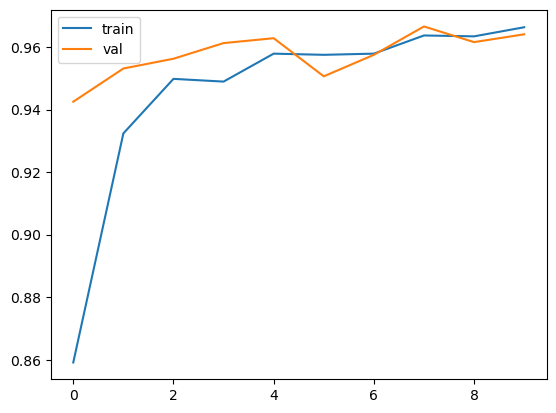

In [37]:
# check accuracy for the training and validation set

plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

In [38]:
# Test

test_gen = datagen.flow_from_dataframe(
    test_df,
    directory=img_dir,
    x_col="image_id",
    y_col="Male",
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

model.evaluate(test_gen)

Found 19962 validated image filenames.
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9478 - loss: 0.1307


[0.13073742389678955, 0.9478008151054382]

In [46]:
y_pred = model.predict(test_gen)

624/624 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step


In [47]:
print(y_pred)

[[1.6638033e-02]
 [9.4799377e-02]
 [7.5391661e-03]
 ...
 [9.7352958e-01]
 [1.8441115e-06]
 [3.3542977e-04]]


In [48]:
y_pred_classes = (y_pred > 0.5).astype(int).ravel()
print(y_pred_classes)

[0 0 0 ... 1 0 0]


In [49]:
y_true = test_df["Male"].values
print(len(y_true), len(y_pred_classes))

19962 19962


In [53]:
# confusion matrix

cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[11377   870]
 [  172  7543]]


In [78]:
# normalization

n_female = (y_true == 0).sum()
n_male = (y_true == 1).sum()

print("Total Female:", n_female)
print("Total Male:", n_male)

TN, FP, FN, TP = cm.ravel()

female_error_rate = FP / n_female
male_error_rate   = FN / n_male

print(f"Female error rate (FP rate): {female_error_rate:.3f}")
print(f"Male error rate (FN rate): {male_error_rate:.3f}")

Total Female: 12247
Total Male: 7715
Female error rate (FP rate): 0.071
Male error rate (FN rate): 0.022


The model makes many more errors in predicting females. It seems to tend to classify as male when it is uncertain.
Possible explanation: females could have more eterogeneous characteristics than man.

In [54]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     12247
           1       0.90      0.98      0.94      7715

    accuracy                           0.95     19962
   macro avg       0.94      0.95      0.95     19962
weighted avg       0.95      0.95      0.95     19962



Errori totali: 1042


Text(0.5, 1.0, 'True: 0 | Pred: 0.58')

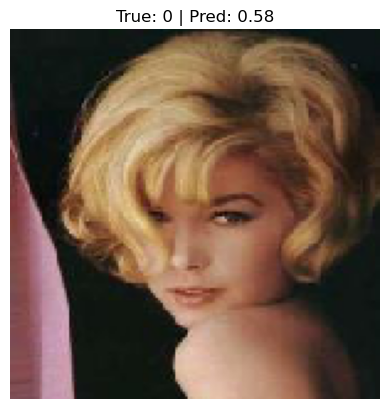

In [76]:
# visualization of some errors

wrong_idx = np.where(y_pred_classes != y_true)[0]
print("Errori totali:", len(wrong_idx))

idx = random.choice(wrong_idx)

img_name = test_df.iloc[idx]["image_id"]
true_label = y_true[idx]
pred_prob = y_pred[idx][0]

img_path = os.path.join(img_dir, img_name)
img = load_img(img_path, target_size=(150,150))

plt.imshow(img)
plt.axis("off")
plt.title(f"True: {true_label} | Pred: {pred_prob:.2f}")

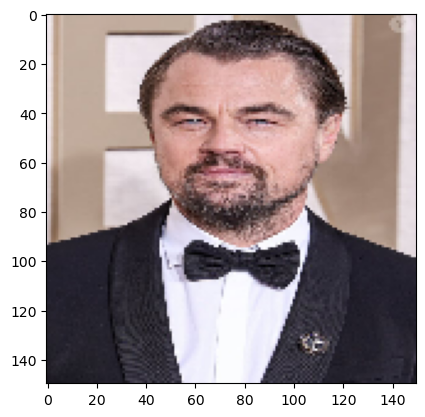

In [56]:
# Leonardo Di Caprio - test

img_path = r"C:\Users\Chiara\Pictures\leonardo.jpg"

img = load_img(img_path, target_size=(150,150))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)

In [57]:
prediction = model.predict(img_array)[0][0]
print("Probability:", prediction)

if prediction > 0.5:
    print("Prediction: Male")
else:
    print("Prediction: Female")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Probability: 0.9209477
Prediction: Male


## Multi-label : MobileNetV2 with fine-tuning (transfer learning)

In [11]:
# attributes I want to predict

attributes = ["Male", "Smiling", "Eyeglasses", "Blond_Hair", "Young"]
df[attributes] = (df[attributes] == 1).astype(int)

In [12]:
train_df = df[df.partition == 0]
val_df = df[df.partition == 1]
test_df = df[df.partition == 2]

print(len(train_df), len(val_df), len(test_df))

162770 19867 19962


In [13]:
train_df[attributes].head()

,Male,Smiling,Eyeglasses,Blond_Hair,Young
0,0,1,0,0,1
1,0,1,0,0,1
2,1,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [14]:
# rescaling images and data generator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    directory=img_dir,
    x_col="image_id",
    y_col=attributes,
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=True
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    directory=img_dir,
    x_col="image_id",
    y_col=attributes,
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

Found 162770 validated image filenames.
Found 19867 validated image filenames.


In [15]:
# Model backbone

base_model = MobileNetV2(
    input_shape=(150,150,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # freeze everything

C:\Users\Chiara\AppData\Local\Temp\ipykernel_4420\94373967.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [16]:
# rest of the model

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation="relu")(x)  # optional
output = Dense(len(attributes), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

In [17]:
# compile

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [18]:
# training

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 272s 53ms/step - accuracy: 0.5920 - loss: 0.2555 - val_accuracy: 0.6250 - val_loss: 0.2448
Epoch 2/5
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 274s 54ms/step - accuracy: 0.6146 - loss: 0.2353 - val_accuracy: 0.6180 - val_loss: 0.2439
Epoch 3/5
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 270s 53ms/step - accuracy: 0.6227 - loss: 0.2277 - val_accuracy: 0.6141 - val_loss: 0.2368
Epoch 4/5
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 275s 54ms/step - accuracy: 0.6268 - loss: 0.2217 - val_accuracy: 0.6251 - val_loss: 0.2356
Epoch 5/5
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 269s 53ms/step - accuracy: 0.6324 - loss: 0.2169 - val_accuracy: 0.5982 - val_loss: 0.2394


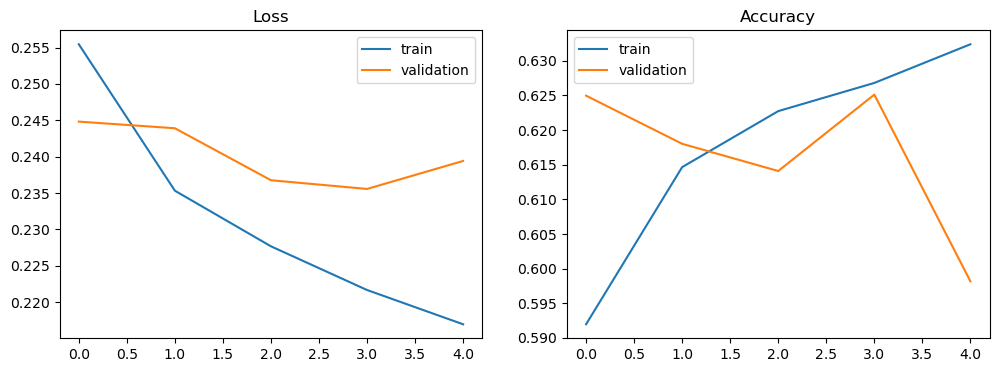

In [19]:
# loss and accuracy though epochs

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.legend()

In [21]:
# testing

test_gen = datagen.flow_from_dataframe(
    test_df,
    directory=img_dir,
    x_col="image_id",
    y_col=attributes,
    target_size=(150,150),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

model.evaluate(test_gen)

Found 19962 validated image filenames.
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5820 - loss: 0.2444


[0.24443140625953674, 0.5819557309150696]

In [23]:
# analysis by attributes

y_pred = model.predict(test_gen)
y_true = test_df[attributes].values

# transform probabilities in 0 and 1

y_pred_bin = (y_pred > 0.5).astype(int)

# accuracy by attribute

for i, attr in enumerate(attributes):
    acc = np.mean(y_pred_bin[:, i] == y_true[:, i])
    print(f"accuracy on {attr}: {acc:.3f}")

624/624 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step
accuracy on Male: 0.927
accuracy on Smiling: 0.791
accuracy on Eyeglasses: 0.979
accuracy on Blond_Hair: 0.939
accuracy on Young: 0.843


An accuracy of 0.58 could seem low, BUT the criterion is quite strict: all the features must be correct at the same time.
    If we look at the performance by attributes, they are very good.

In [24]:
# fine-tuning
# I unfeeze the last layers

base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

In [25]:
# compile with smaller learning rate (to avoid just to modify weights too much, since they are already good)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [26]:
# I keep training a little bit

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3
)

Epoch 1/3
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 337s 66ms/step - accuracy: 0.6131 - loss: 0.2374 - val_accuracy: 0.6867 - val_loss: 0.2125
Epoch 2/3
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 327s 64ms/step - accuracy: 0.6628 - loss: 0.1973 - val_accuracy: 0.6948 - val_loss: 0.1964
Epoch 3/3
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 318s 62ms/step - accuracy: 0.6804 - loss: 0.1820 - val_accuracy: 0.7080 - val_loss: 0.1891


In [27]:
model.evaluate(test_gen)

624/624 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6997 - loss: 0.1931


[0.19308973848819733, 0.6996793746948242]

In [28]:
# analysis by attributes

y_pred = model.predict(test_gen)
y_true = test_df[attributes].values

# transform probabilities in 0 and 1

y_pred_bin = (y_pred > 0.5).astype(int)

# accuracy by attribute

for i, attr in enumerate(attributes):
    acc = np.mean(y_pred_bin[:, i] == y_true[:, i])
    print(f"accuracy on {attr}: {acc:.3f}")

624/624 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step
accuracy on Male: 0.945
accuracy on Smiling: 0.858
accuracy on Eyeglasses: 0.988
accuracy on Blond_Hair: 0.947
accuracy on Young: 0.858


The accuyracy improved of 12% with fine tuning, and also the accuracy over all the features! :)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Male        : 1.000 → YES
Smiling     : 0.105 → NO
Eyeglasses  : 0.000 → NO
Blond_Hair  : 0.000 → NO
Young       : 0.562 → YES


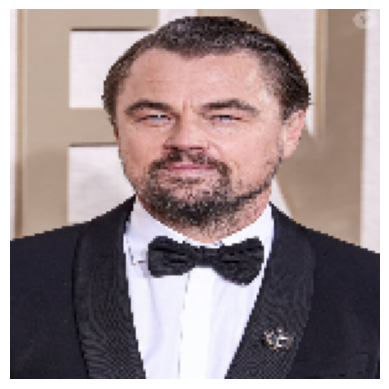

In [29]:
# leonardo di caprio, again

img_path = r"C:\Users\Chiara\Pictures\leonardo.jpg"
img = load_img(img_path, target_size=(150, 150))

plt.imshow(img)
plt.axis("off")

img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)

attributes = ["Male", "Smiling", "Eyeglasses", "Blond_Hair", "Young"]

for attr, p in zip(attributes, pred[0]):
    print(f"{attr:12s}: {p:.3f} → {'YES' if p > 0.5 else 'NO'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Male        : 0.011 → NO
Smiling     : 0.059 → NO
Eyeglasses  : 0.000 → NO
Blond_Hair  : 0.000 → NO
Young       : 0.969 → YES


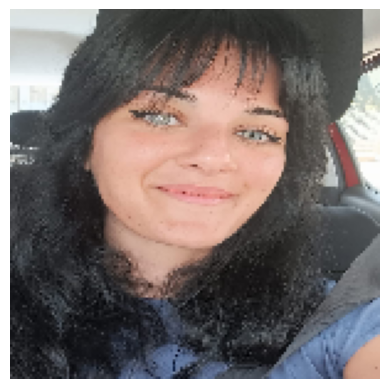

In [32]:
# Me

img_path = r"C:\Users\Chiara\Pictures\me.jfif"
img = load_img(img_path, target_size=(150, 150))

plt.imshow(img)
plt.axis("off")

img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)

attributes = ["Male", "Smiling", "Eyeglasses", "Blond_Hair", "Young"]

for attr, p in zip(attributes, pred[0]):
    print(f"{attr:12s}: {p:.3f} → {'YES' if p > 0.5 else 'NO'}")

I think the model is just not very good at detecting smiling people.